In [1]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import envs
from stable_baselines3 import A2C, PPO


importlib.reload(envs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

setup_name = 'test'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 100
num_episodes = 10

supply_nodes = np.array([7, 8])
supply_amounts = 10 * np.random.poisson(10, size=(2, max_time))
supply_prices = 1 * np.ones(shape=(2, max_time))

demand_nodes = np.array([0])
demand_amounts = 10 * np.random.poisson(10, size=(1, max_time))
demand_prices = 30.0 * np.ones(shape=(1, max_time))

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

env = envs.SupplyChain(node_df, edge_df, supplies, demands, max_time)
#env = envs.VectorisedSupplyChain(node_df, edge_df, 200)

model = PPO('MlpPolicy', env, verbose=0, n_steps=10)
model.learn(total_timesteps=max_time*num_episodes)

/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_po

0 -140.0
0 1218.8
0 1153.0
0 1221.0
0 1187.8999999999999
0 1073.0
0 1093.9
0 1201.6999999999998
0 1343.1
0 1548.8


/Users/max/Documents/PeakAI/rl4sc/envs.py:271: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


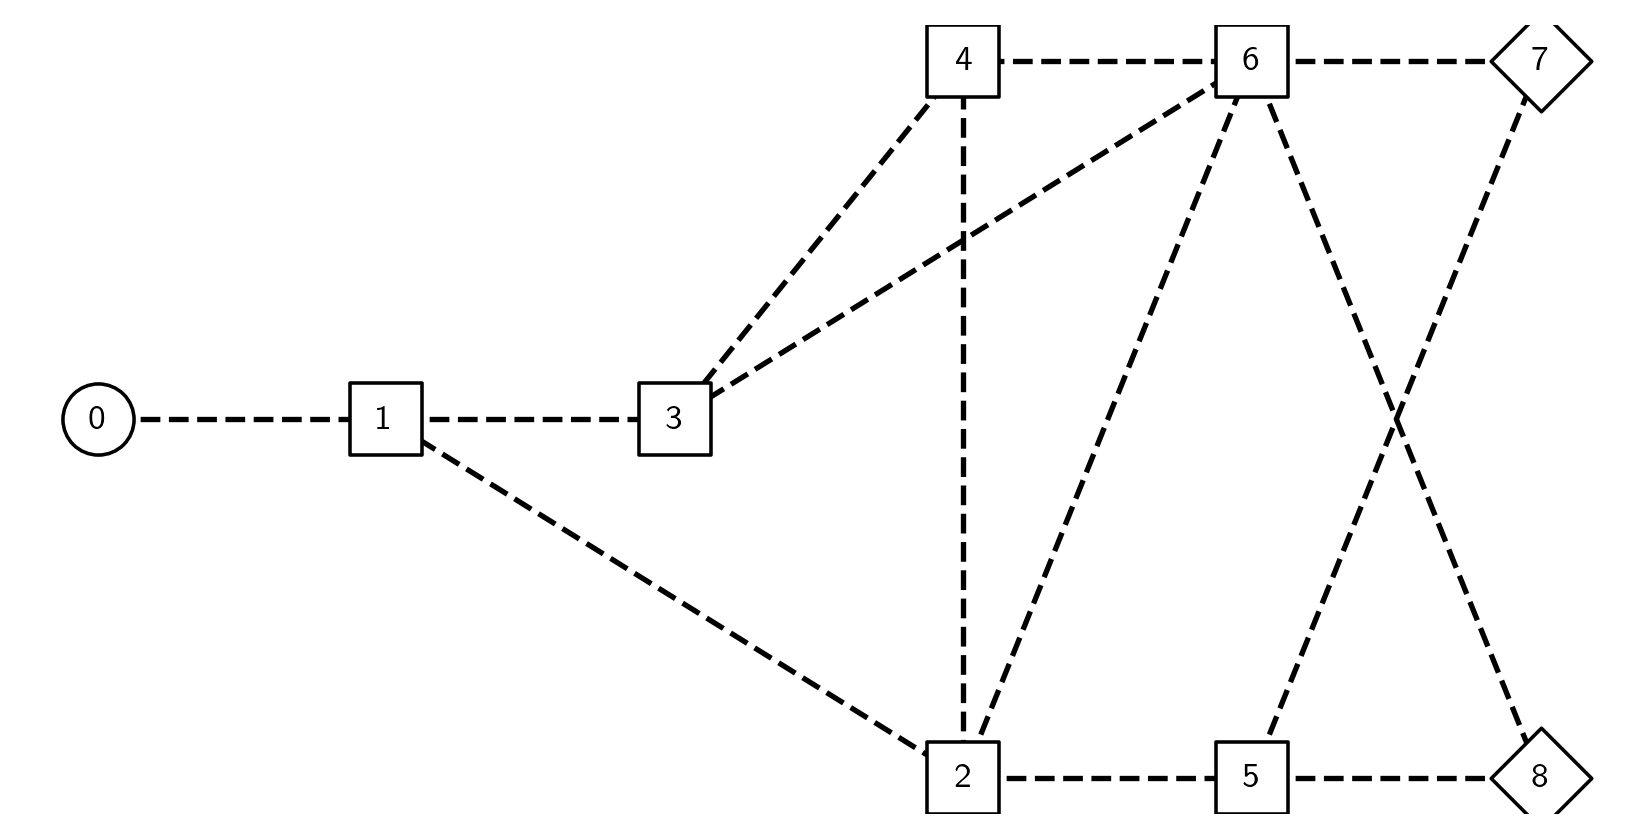

In [2]:
env.plot_chain()

/Users/max/Documents/PeakAI/rl4sc/envs.py:335: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


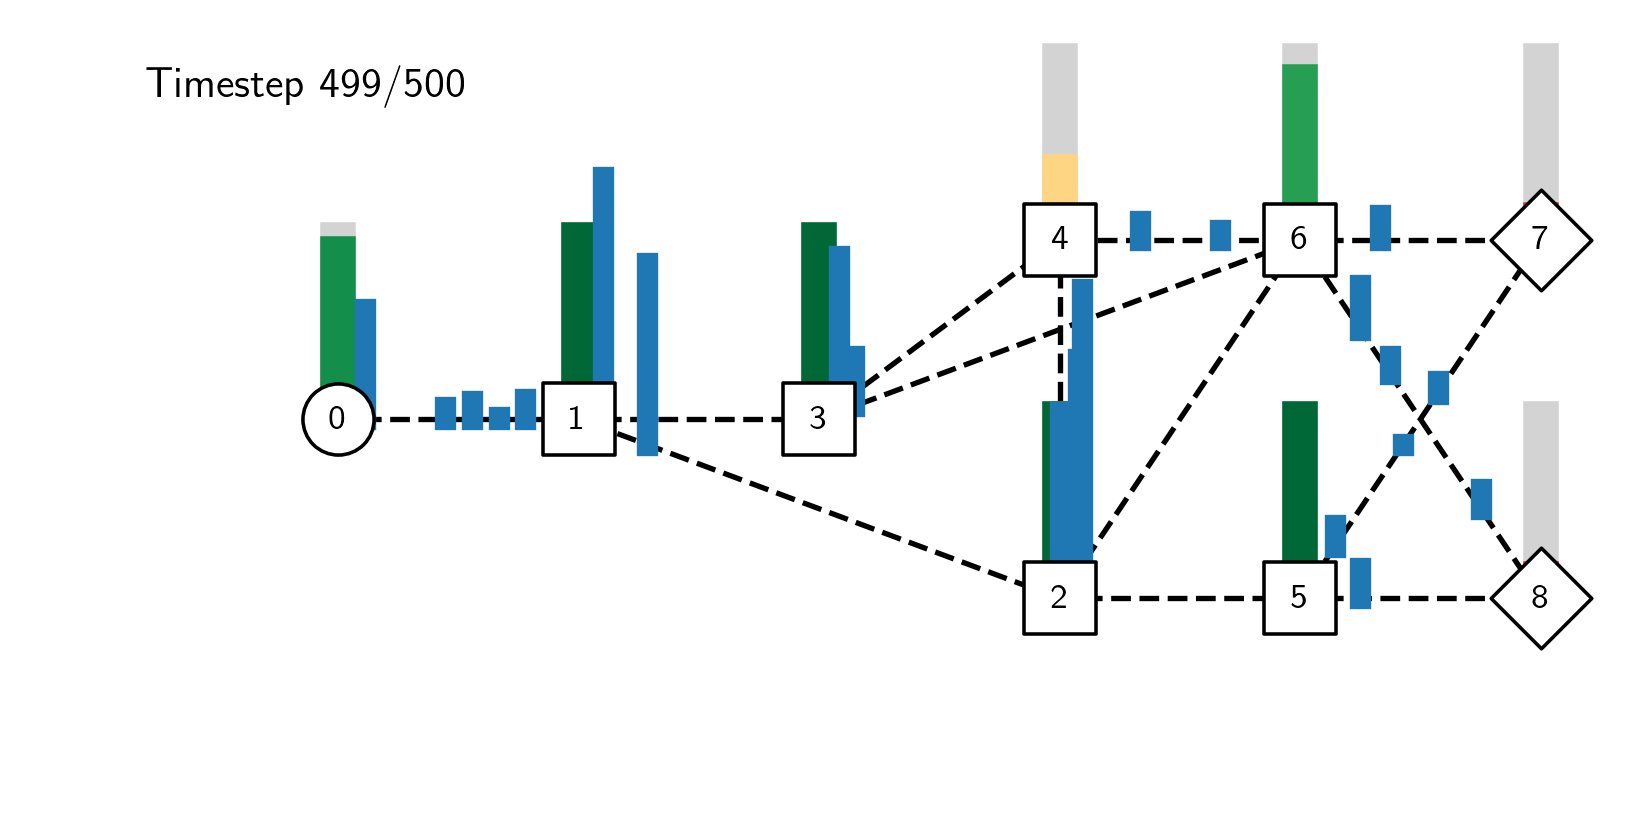

In [6]:
env.animate_history(time_start=0, time_end=500, save_path='supplychains/test/0_500.gif')

In [4]:
# env.plot_history()

/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_41454/4223627597.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


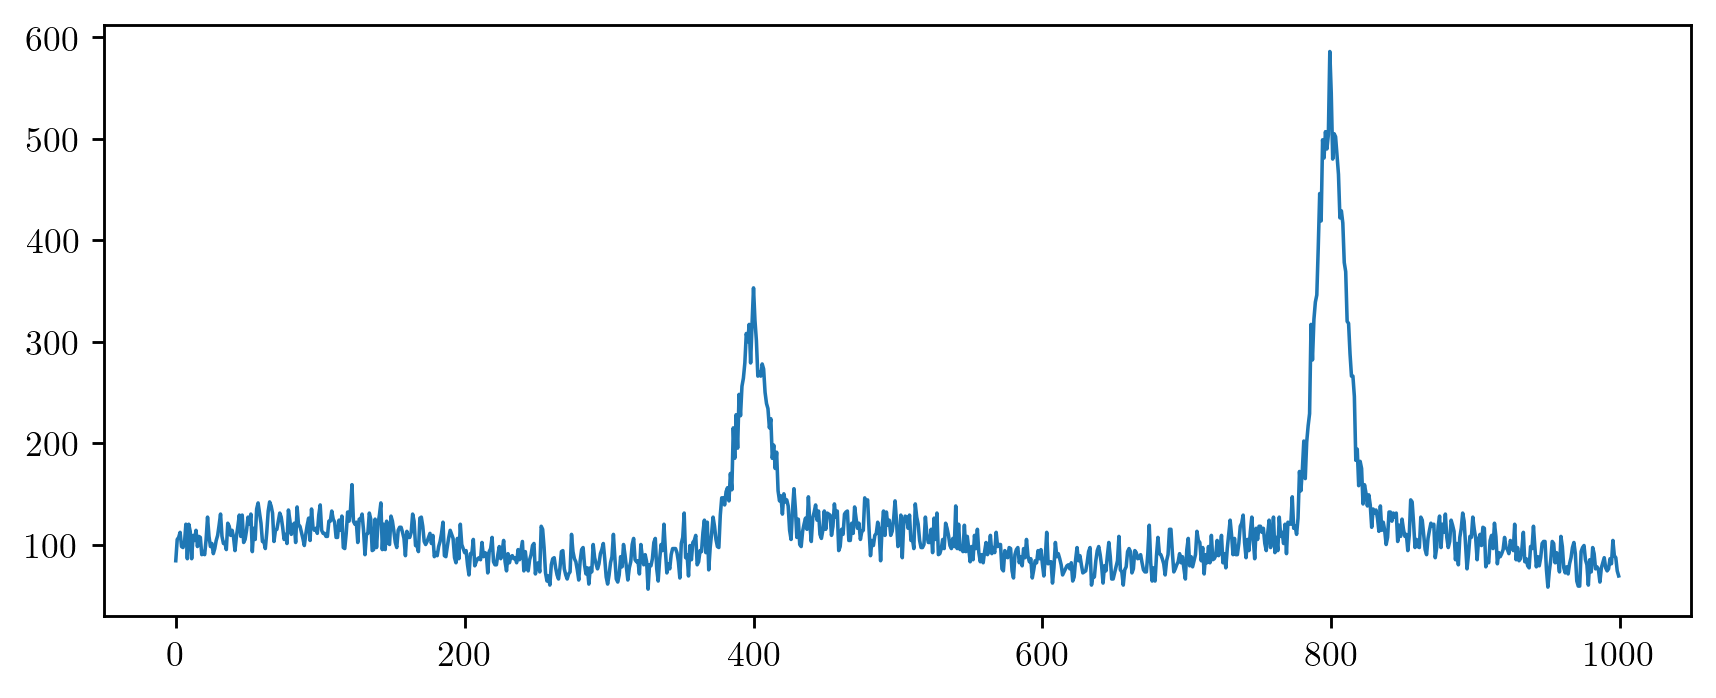

In [5]:
from scipy.stats import poisson, norm


ts = np.arange(1000)

xs = [poisson(100 + 
              10*np.sin(2*t*np.pi/7) + 
              20*np.sin(2*t*np.pi/365) + 
              5000*norm.pdf(t, 400, 10) + 
              10000*norm.pdf(t, 800, 10)).rvs() for t in range(1000)]
#xs = [poisson(100 + 10000*norm.pdf(t, 400, 20)).rvs() for t in range(1000)]
#xs = [0]

##for i in range(1, 1000):
#    xs.append(norm(loc=xs[i-1], scale=1.0).rvs())

fig, ax = plt.subplots()
fig.set_size_inches(8, 3)

ax.plot(ts, xs, color='tab:blue', linewidth=1.0)

fig.show()